In [24]:
#importing libraries

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import cufflinks as cf
%matplotlib inline

<h2> Importing Data </h2>

In [25]:
# define column names for easy indexing

col_names = ['unit_number','time_in_cycles','op_setting_1','op_setting_2','op_setting_3','T2','T24','T30','T50','P2','P15','P30','Nf',
           'Nc','epr','Ps30','phi','NRf','NRc','BPR','farB','htBleed','Nf_dmd','PCNfR_dmd','W31','W32' ]
           
# read text file into pandas DataFrame
turbo_engine = pd.read_csv('Data/train_FD001.txt', sep='\s+', header=None, names=col_names)


<h2> Analysing the variables present in the dataset </h2>

In [26]:
turbo_engine.head(100)

unit_number  time_in_cycles  op_setting_1  op_setting_2  op_setting_3  \
0             1               1       -0.0007       -0.0004         100.0   
1             1               2        0.0019       -0.0003         100.0   
2             1               3       -0.0043        0.0003         100.0   
3             1               4        0.0007        0.0000         100.0   
4             1               5       -0.0019       -0.0002         100.0   
..          ...             ...           ...           ...           ...   
95            1              96       -0.0034        0.0001         100.0   
96            1              97        0.0035       -0.0003         100.0   
97            1              98        0.0006        0.0004         100.0   
98            1              99       -0.0005       -0.0000         100.0   
99            1             100       -0.0021       -0.0003         100.0   

        T2     T24      T30      T50     P2  ...     phi      NRf      NRc  \
0   518.67  641.82  1589.70  1400.60  14.62  ...  521.66  2388.02  8138.62   
1   518.67  642.15  1591.82  1403.14  14.62  ...  522.28  2388.07  8131.49   
2   518.67  642.35  1587.99  1404.20  14.62  ...  522.42  2388.03  8133.23   
3   518.67  642.35  1582.79  1401.87  14.62  ...  522.86  2388.08  8133.83   
4   518.67  642.37  1582.85  1406.22  14.62  ...  522.19  2388.04  8133.80   
..     ...     ...      ...      ...    ...  ...     ...      ...      ...   
95  518.67  642.19  1584.07  1395.16  14.62  ...  521.66  2388.06  8130.69   
96  518.67  642.07  1595.77  1407.81  14.62  ...  521.67  2388.06  8128.74   
97  518.67  642.00  1591.11  1404.56  14.62  ...  522.31  2388.06  8127.89   
98  518.67  642.46  1592.73  1406.13  14.62  ...  521.42  2388.10  8131.77   
99  518.67  642.22  1589.63  1411.35  14.62  ...  521.55  2388.08  8132.49   

       BPR  farB  htBleed  Nf_dmd  PCNfR_dmd    W31      W32  
0   8.4195  0.03      392    2388      100.0  39.06  23.4190  
1   8.4318  0.03      392    2388      100.0  39.00  23.4236  
2   8.4178  0.03      390    2388      100.0  38.95  23.3442  
3   8.3682  0.03      392    2388      100.0  38.88  23.3739  
4   8.4294  0.03      393    2388      100.0  38.90  23.4044  
..     ...   ...      ...     ...        ...    ...      ...  
95  8.4311  0.03      392    2388      100.0  38.88  23.3255  
96  8.4105  0.03      392    2388      100.0  39.01  23.2963  
97  8.4012  0.03      391    2388      100.0  38.96  23.2554  
98  8.4481  0.03      393    2388      100.0  38.82  23.2323  
99  8.4241  0.03      392    2388      100.0  38.93  23.4090  

[100 rows x 26 columns]

In [27]:
turbo_engine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20631 entries, 0 to 20630
Data columns (total 26 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   unit_number     20631 non-null  int64  
 1   time_in_cycles  20631 non-null  int64  
 2   op_setting_1    20631 non-null  float64
 3   op_setting_2    20631 non-null  float64
 4   op_setting_3    20631 non-null  float64
 5   T2              20631 non-null  float64
 6   T24             20631 non-null  float64
 7   T30             20631 non-null  float64
 8   T50             20631 non-null  float64
 9   P2              20631 non-null  float64
 10  P15             20631 non-null  float64
 11  P30             20631 non-null  float64
 12  Nf              20631 non-null  float64
 13  Nc              20631 non-null  float64
 14  epr             20631 non-null  float64
 15  Ps30            20631 non-null  float64
 16  phi             20631 non-null  float64
 17  NRf             20631 non-null 

In [28]:
#turbo_engine[['Nf_dmd','htBleed','op_setting_3']].describe()
turbo_engine.describe()

unit_number  time_in_cycles  op_setting_1  op_setting_2  op_setting_3  \
count  20631.000000    20631.000000  20631.000000  20631.000000       20631.0   
mean      51.506568      108.807862     -0.000009      0.000002         100.0   
std       29.227633       68.880990      0.002187      0.000293           0.0   
min        1.000000        1.000000     -0.008700     -0.000600         100.0   
25%       26.000000       52.000000     -0.001500     -0.000200         100.0   
50%       52.000000      104.000000      0.000000      0.000000         100.0   
75%       77.000000      156.000000      0.001500      0.000300         100.0   
max      100.000000      362.000000      0.008700      0.000600         100.0   

                 T2           T24           T30           T50            P2  \
count  2.063100e+04  20631.000000  20631.000000  20631.000000  2.063100e+04   
mean   5.186700e+02    642.680934   1590.523119   1408.933782  1.462000e+01   
std    6.537152e-11      0.500053      6.131150      9.000605  3.394700e-12   
min    5.186700e+02    641.210000   1571.040000   1382.250000  1.462000e+01   
25%    5.186700e+02    642.325000   1586.260000   1402.360000  1.462000e+01   
50%    5.186700e+02    642.640000   1590.100000   1408.040000  1.462000e+01   
75%    5.186700e+02    643.000000   1594.380000   1414.555000  1.462000e+01   
max    5.186700e+02    644.530000   1616.910000   1441.490000  1.462000e+01   

       ...           phi           NRf           NRc           BPR  \
count  ...  20631.000000  20631.000000  20631.000000  20631.000000   
mean   ...    521.413470   2388.096152   8143.752722      8.442146   
std    ...      0.737553      0.071919     19.076176      0.037505   
min    ...    518.690000   2387.880000   8099.940000      8.324900   
25%    ...    520.960000   2388.040000   8133.245000      8.414900   
50%    ...    521.480000   2388.090000   8140.540000      8.438900   
75%    ...    521.950000   2388.140000   8148.310000      8.465600   
max    ...    523.380000   2388.560000   8293.720000      8.584800   

               farB       htBleed   Nf_dmd  PCNfR_dmd           W31  \
count  2.063100e+04  20631.000000  20631.0    20631.0  20631.000000   
mean   3.000000e-02    393.210654   2388.0      100.0     38.816271   
std    1.556432e-14      1.548763      0.0        0.0      0.180746   
min    3.000000e-02    388.000000   2388.0      100.0     38.140000   
25%    3.000000e-02    392.000000   2388.0      100.0     38.700000   
50%    3.000000e-02    393.000000   2388.0      100.0     38.830000   
75%    3.000000e-02    394.000000   2388.0      100.0     38.950000   
max    3.000000e-02    400.000000   2388.0      100.0     39.430000   

                W32  
count  20631.000000  
mean      23.289705  
std        0.108251  
min       22.894200  
25%       23.221800  
50%       23.297900  
75%       23.366800  
max       23.618400  

[8 rows x 26 columns]

<h2> Checking if any of the variables have missing values </h2>

<AxesSubplot:>

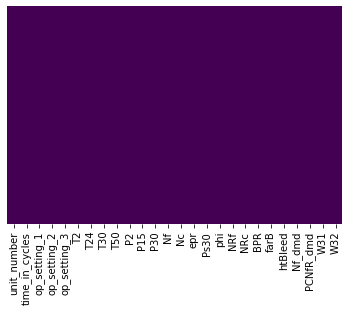

In [29]:
sns.heatmap(turbo_engine.isnull(),yticklabels=False,cbar=False,cmap='viridis')

<h2> Dropping columns haviing STD = 0 and variables which do not carry any information </h2>

In [30]:
#delete columns which are constant (std=0)
turbo_engine = turbo_engine.loc[:, turbo_engine.std() > 0.0]

#delete columns ​​that do not carry information 
turbo_engine.drop(columns=['P2','farB', 'T2', 'epr'],inplace=True)

<h2> Plotting Correlation Heatmap for Exploratory Data Analysis</h2>

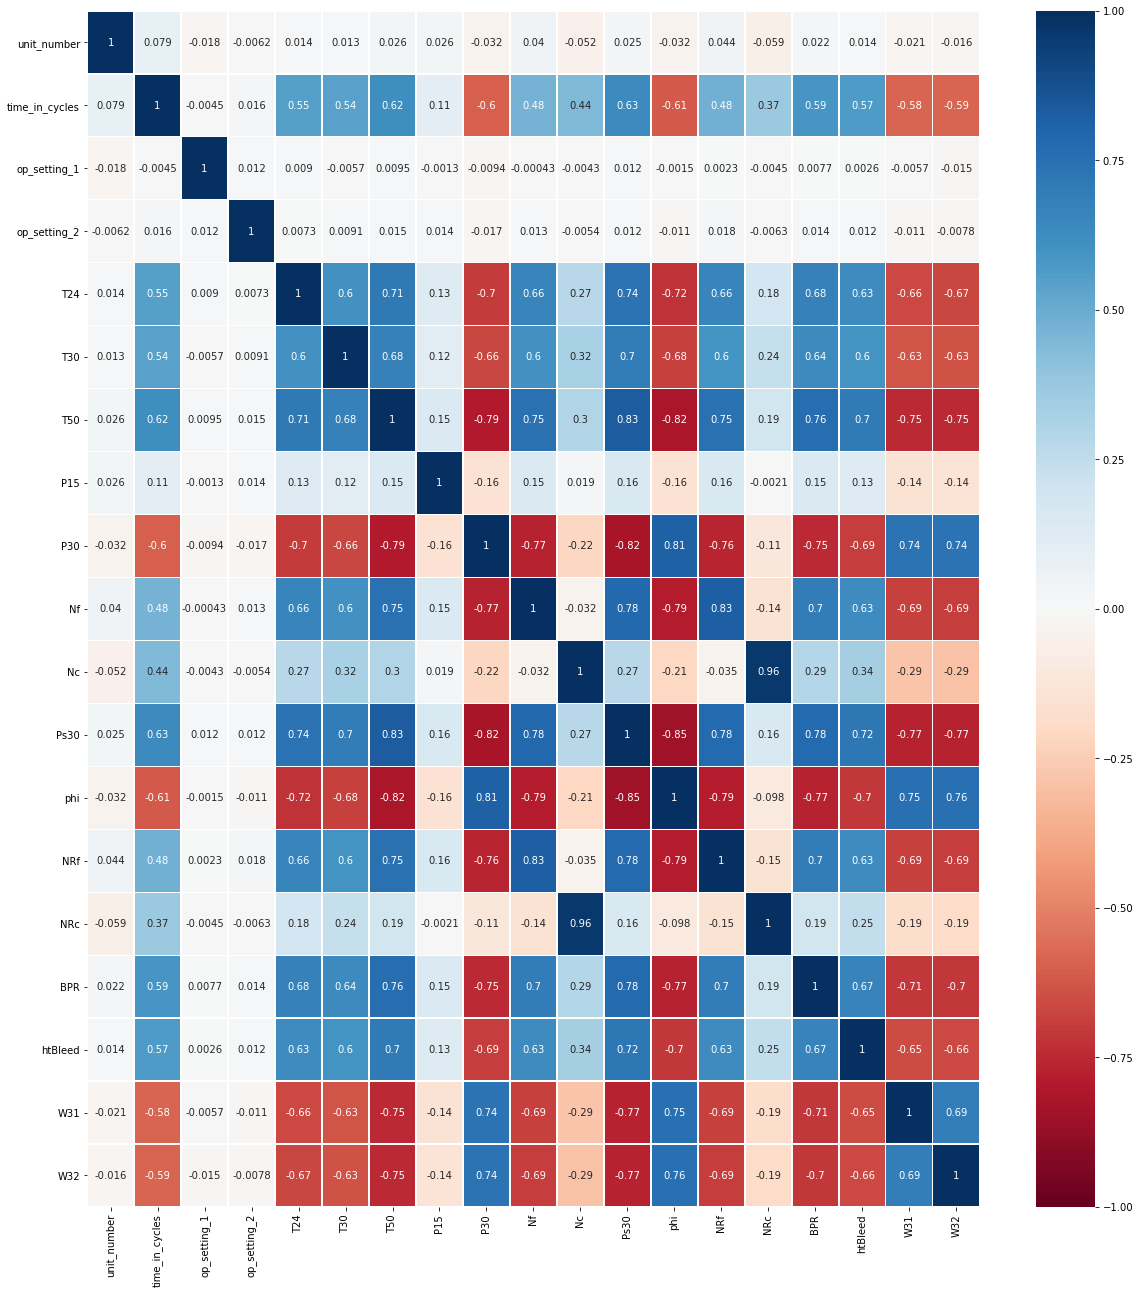

In [31]:
corr = turbo_engine.corr()
sns.heatmap(corr,cmap='RdBu', vmin=-1, vmax=1, annot=True,linewidths=0.2, xticklabels=True, yticklabels=True)
fig=plt.gcf()
fig.set_size_inches(20,22)
plt.show()

<p> After observing above heatmap, <b> Nc and NRc </b> are highly correlate (0.96) so dropping Nc column </p>

<p> Also, we can observe that <b>'setting_1' 'setting_2' and 'P15'</b> correlation is low with all the other columns </p>

<p> Hence all of these columns are dropped </p>

In [32]:
turbo_engine = turbo_engine.drop(columns = ['op_setting_1','op_setting_2','P15','Nc'])

<h2> Plotting distributions of all features using histplot </h2>

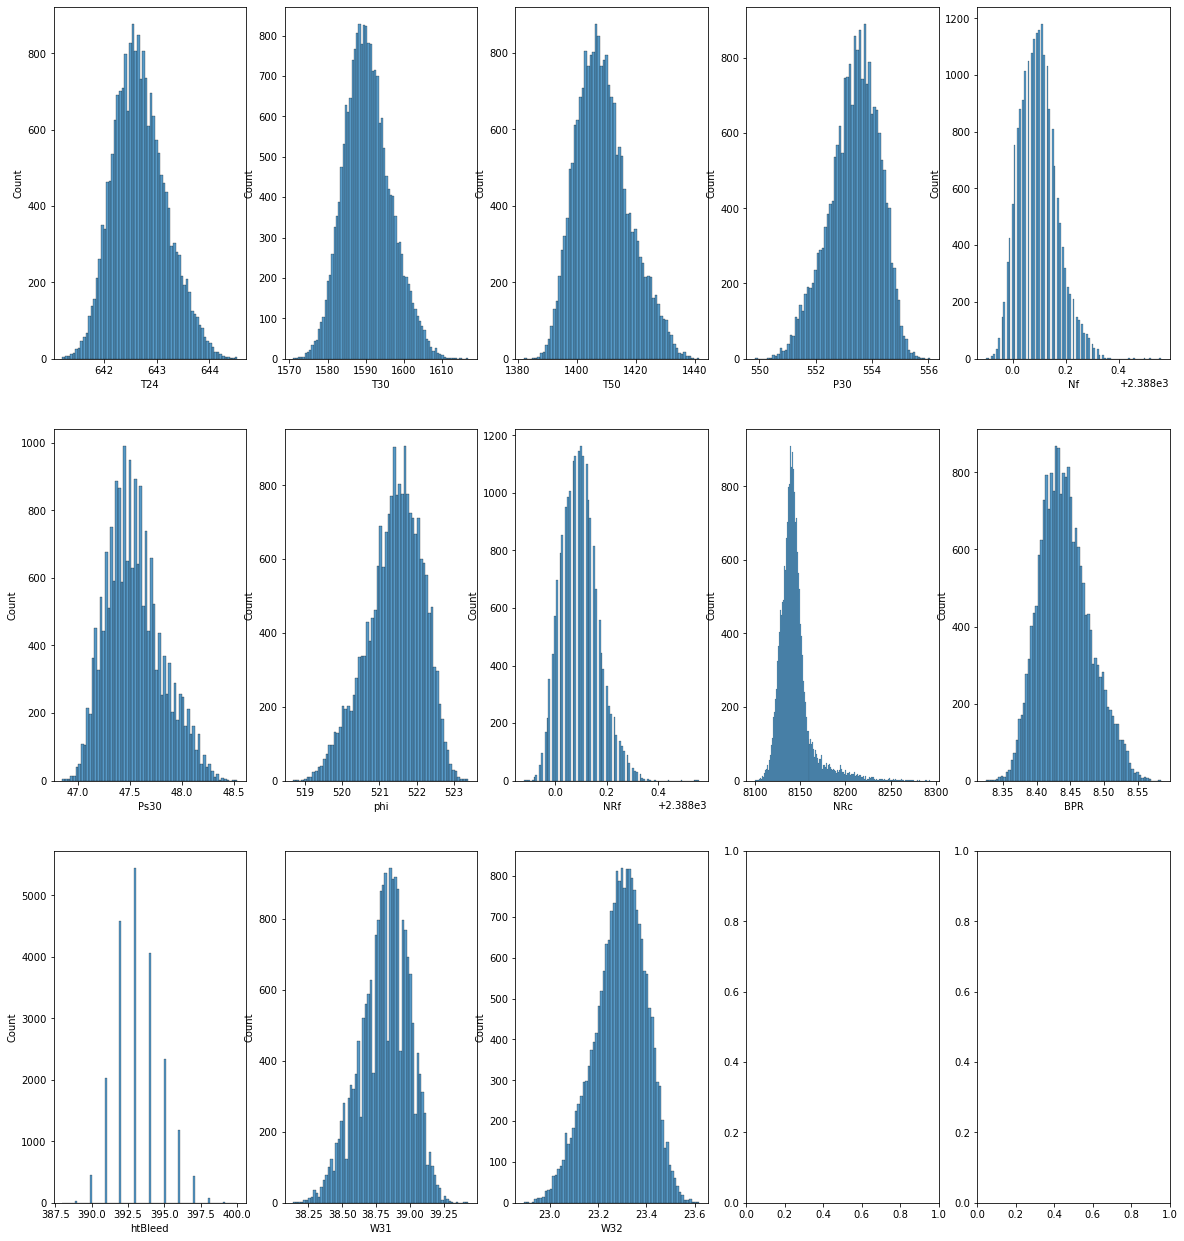

In [33]:
# Define the number of rows and columns you want

n_rows=3
n_cols=5

# Create the subplots

colums_for_distribution = ['T24', 'T30', 'T50', 'P30', 'Nf',
       'Ps30', 'phi', 'NRf', 'NRc', 'BPR', 'htBleed', 'W31', 'W32']

fig, axes = plt.subplots(nrows=n_rows, ncols=n_cols)
fig.set_size_inches(20,22)
for i, column in enumerate(colums_for_distribution):
    sns.histplot(turbo_engine[column],ax=axes[i//n_cols,i%n_cols])

<h2> Value ranges for all columns </h2>

In [34]:
col_ranges = turbo_engine.max() - turbo_engine.min()
col_ranges

unit_number        99.0000
time_in_cycles    361.0000
T24                 3.3200
T30                45.8700
T50                59.2400
P30                 6.2100
Nf                  0.6600
Ps30                1.6800
phi                 4.6900
NRf                 0.6800
NRc               193.7800
BPR                 0.2599
htBleed            12.0000
W31                 1.2900
W32                 0.7242
dtype: float64

<h2> Data Visualization using Box Plot </h2>

In [48]:
from plotly import __version__
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot

print(__version__) # requires version >= 1.9.0

init_notebook_mode(connected=True)
# For offline use
cf.go_offline()
turbo_engine.iplot(kind='box')

5.4.0


{'whiskers': [<matplotlib.lines.Line2D at 0x1adfb086250>,
 'caps': [<matplotlib.lines.Line2D at 0x1adfb086910>,
 'boxes': [<matplotlib.lines.Line2D at 0x1adfb07eeb0>],
 'medians': [<matplotlib.lines.Line2D at 0x1adfb086fd0>],
 'fliers': [<matplotlib.lines.Line2D at 0x1adfb068370>],
 'means': []}

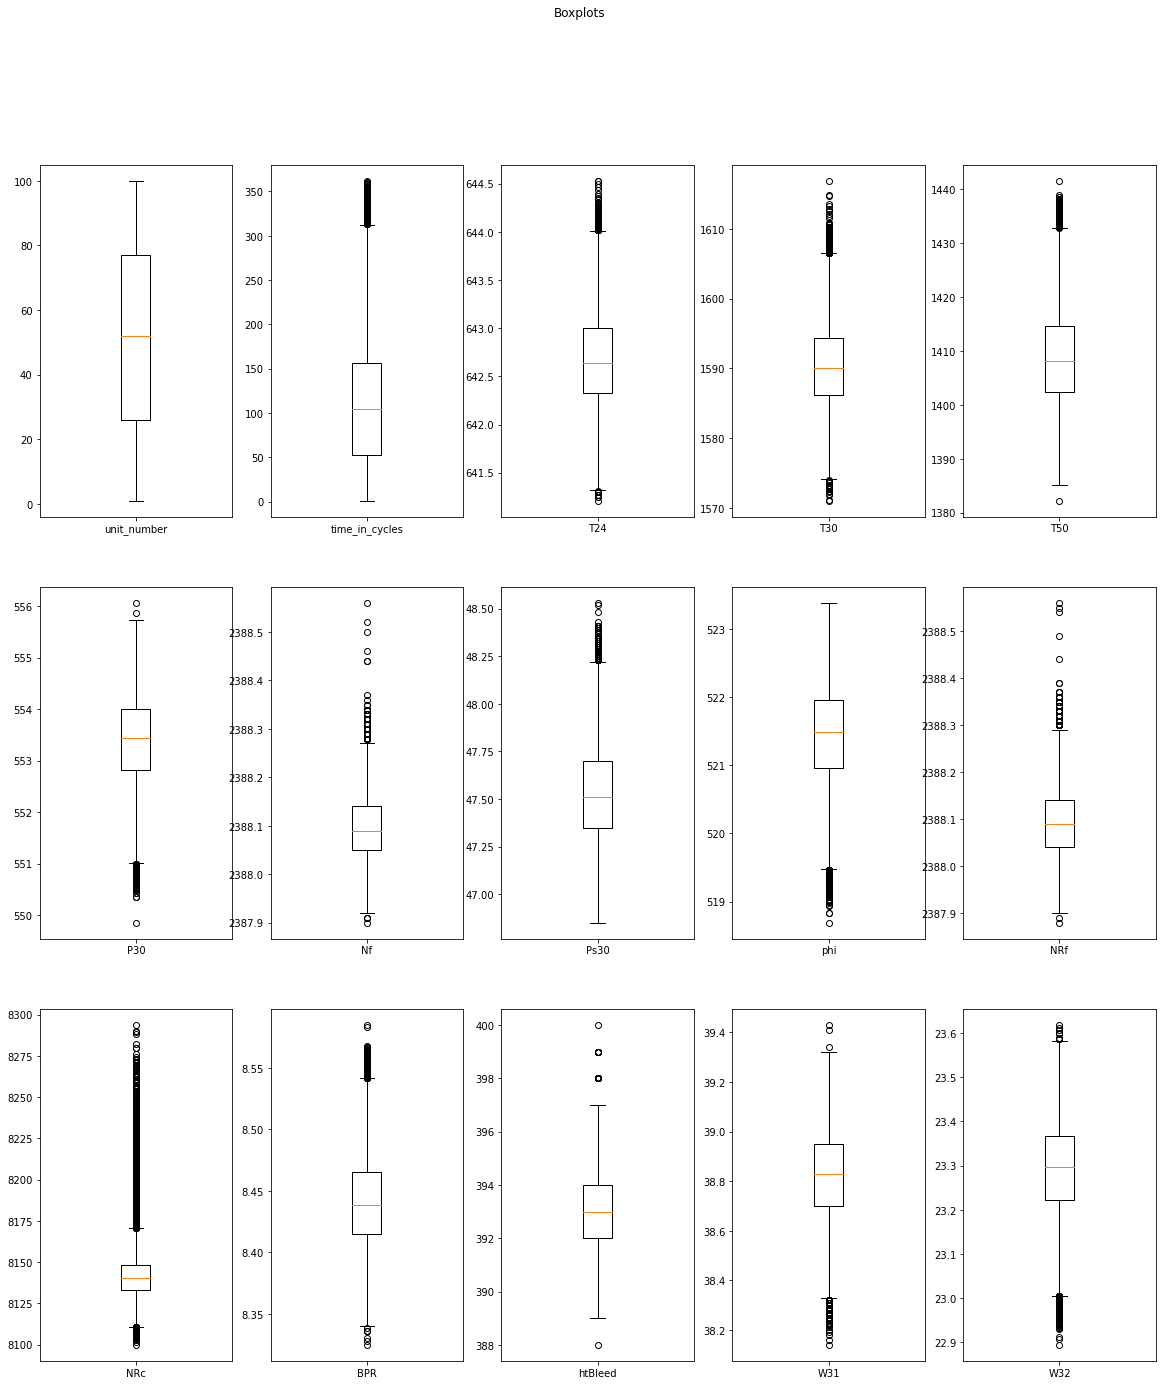

In [49]:
fig1, axs = plt.subplots(3,5)
fig1.set_size_inches(20,22)
fig1.suptitle('Boxplots')
axs[0,0].boxplot(turbo_engine.iloc[:,0], labels=['unit_number'])
axs[0,1].boxplot(turbo_engine.iloc[:,1], labels=['time_in_cycles'])
axs[0,2].boxplot(turbo_engine.iloc[:,2], labels=['T24'])
axs[0,3].boxplot(turbo_engine.iloc[:,3], labels=['T30'])
axs[0,4].boxplot(turbo_engine.iloc[:,4], labels=['T50'])
axs[1,0].boxplot(turbo_engine.iloc[:,5], labels=['P30'])
axs[1,1].boxplot(turbo_engine.iloc[:,6], labels=['Nf'])
axs[1,2].boxplot(turbo_engine.iloc[:,7], labels=['Ps30'])
axs[1,3].boxplot(turbo_engine.iloc[:,8], labels=['phi'])
axs[1,4].boxplot(turbo_engine.iloc[:,9], labels=['NRf'])
axs[2,0].boxplot(turbo_engine.iloc[:,10], labels=['NRc'])
axs[2,1].boxplot(turbo_engine.iloc[:,11], labels=['BPR'])
axs[2,2].boxplot(turbo_engine.iloc[:,12], labels=['htBleed'])
axs[2,3].boxplot(turbo_engine.iloc[:,13], labels=['W31'])
axs[2,4].boxplot(turbo_engine.iloc[:,14], labels=['W32'])

<p> <b>We can infer from the boxplot the following points:</b>

<i>We said before in the distribution plots of all the variables that variables BPR, T24, T30, T50, Ps30, htBleed have a normal distribution. Here we can confirm this because its boxplots are in the middle of the y-axis. The same for the variables P30, phi, and W32 which are right-skewed (we can see that their boxplots are above the middle of the y-axis), and Ps30, NRc are left-skewed (their boxplots are below the middle of the y-axis).  These graphics that are skewed  present heavy tails. </i></br>

<i>We can see that in some boxplots, such as the ones of the variables htBleed,T50 or P30 there are some samples out of the range of the boxplots. We have to study these cases more carefully because they can be outliers.</i></br>

<i>It seems that the data is scattered because the distance between the minimum and the maximum of the boxplot is big.</i></p></br>


<h1> Week 3 <h1>

<h2> Outliers treatment  </h2>

As we have given this topic in the 26th of September lesson, we will include it in the next submission.

<h2> Scaling and Centering Data </h2>

<b>Does the dataset have too many observations? How can I perform sampling from the dataset so that my results won’t be affected? </b>

In [23]:
turbo_engine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20631 entries, 0 to 20630
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   unit_number     20631 non-null  int64  
 1   time_in_cycles  20631 non-null  int64  
 2   T24             20631 non-null  float64
 3   T30             20631 non-null  float64
 4   T50             20631 non-null  float64
 5   P30             20631 non-null  float64
 6   Nf              20631 non-null  float64
 7   Ps30            20631 non-null  float64
 8   phi             20631 non-null  float64
 9   NRf             20631 non-null  float64
 10  NRc             20631 non-null  float64
 11  BPR             20631 non-null  float64
 12  htBleed         20631 non-null  int64  
 13  W31             20631 non-null  float64
 14  W32             20631 non-null  float64
dtypes: float64(12), int64(3)
memory usage: 2.4 MB


<p> The total number of columns are 15 and there are 20631 cycles (rows) of observations <p> 
<p> The dataset doesn't have too many variables and observations <p>
<p> There will be no need to treate categorical variables since all the variables in the dataset are numerical.
                                                                     




<b>Are the variables in my dataset expressed in different measurement units, different scales? If so, what should I do to have values in the same range?</b>

<p> The Variables have different measurement units and are in different scale, so normalization needs to be done in order to scale the values in the same range </p>

In [35]:
turbo_engine.describe()

unit_number  time_in_cycles           T24           T30           T50  \
count  20631.000000    20631.000000  20631.000000  20631.000000  20631.000000   
mean      51.506568      108.807862    642.680934   1590.523119   1408.933782   
std       29.227633       68.880990      0.500053      6.131150      9.000605   
min        1.000000        1.000000    641.210000   1571.040000   1382.250000   
25%       26.000000       52.000000    642.325000   1586.260000   1402.360000   
50%       52.000000      104.000000    642.640000   1590.100000   1408.040000   
75%       77.000000      156.000000    643.000000   1594.380000   1414.555000   
max      100.000000      362.000000    644.530000   1616.910000   1441.490000   

                P30            Nf          Ps30           phi           NRf  \
count  20631.000000  20631.000000  20631.000000  20631.000000  20631.000000   
mean     553.367711   2388.096652     47.541168    521.413470   2388.096152   
std        0.885092      0.070985      0.267087      0.737553      0.071919   
min      549.850000   2387.900000     46.850000    518.690000   2387.880000   
25%      552.810000   2388.050000     47.350000    520.960000   2388.040000   
50%      553.440000   2388.090000     47.510000    521.480000   2388.090000   
75%      554.010000   2388.140000     47.700000    521.950000   2388.140000   
max      556.060000   2388.560000     48.530000    523.380000   2388.560000   

                NRc           BPR       htBleed           W31           W32  
count  20631.000000  20631.000000  20631.000000  20631.000000  20631.000000  
mean    8143.752722      8.442146    393.210654     38.816271     23.289705  
std       19.076176      0.037505      1.548763      0.180746      0.108251  
min     8099.940000      8.324900    388.000000     38.140000     22.894200  
25%     8133.245000      8.414900    392.000000     38.700000     23.221800  
50%     8140.540000      8.438900    393.000000     38.830000     23.297900  
75%     8148.310000      8.465600    394.000000     38.950000     23.366800  
max     8293.720000      8.584800    400.000000     39.430000     23.618400

<AxesSubplot:>

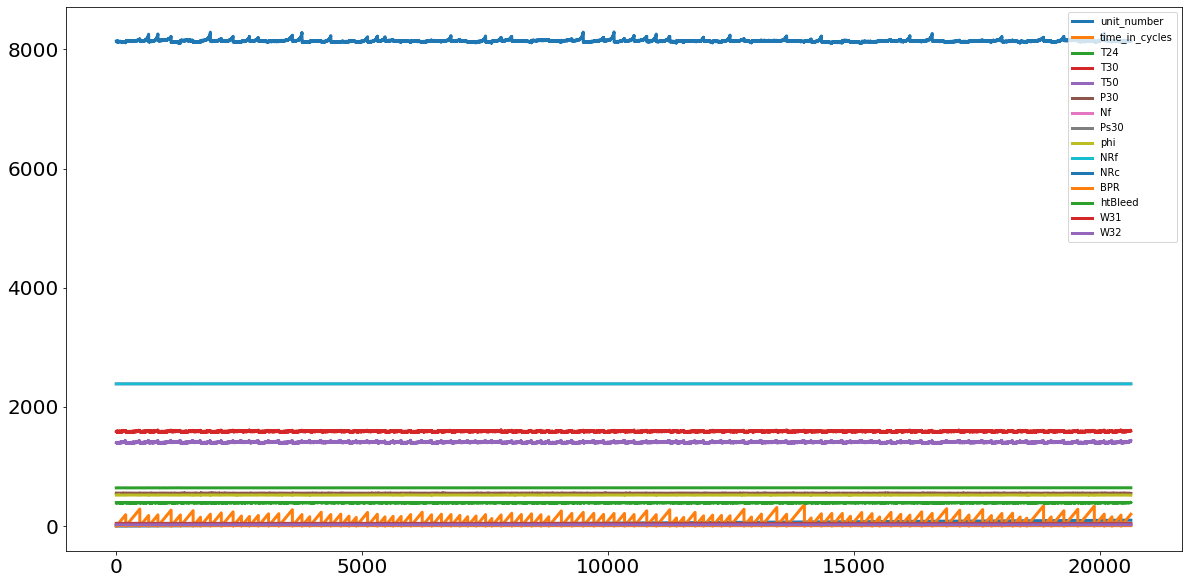

In [40]:
turbo_engine.plot(figsize=(20,10), linewidth=3, fontsize = 20)

<h4> Using Standard Scaler to Standardize variables by removing the mean and scaling to unit variance. </h4>

<p> Standard Scaler normalizes data by, <b> z = (x - u) / s </b>

where u is the mean of the training samples, and s is the standard deviation of the training samples</p>
Centering and scaling happen independently on each feature by computing the relevant statistics on the samples in the training set.

In [43]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(turbo_engine.drop(turbo_engine.iloc[:, 0:2], axis=1))
#scaler.fit(turbo_engine)

StandardScaler()

In [44]:
#scaled_features = scaler.transform(turbo_engine)
scaled_features = scaler.transform(turbo_engine.drop(turbo_engine.iloc[:, 0:2], axis=1))

In [45]:
#df_feat = pd.DataFrame(scaled_features,columns=turbo_engine.columns)
df_feat = pd.DataFrame(scaled_features,columns=turbo_engine.columns[2:])
df_feat.head()

T24       T30       T50       P30        Nf      Ps30       phi  \
0 -1.721725 -0.134255 -0.925936  1.121141 -0.516338 -0.266467  0.334262   
1 -1.061780  0.211528 -0.643726  0.431930 -0.798093 -0.191583  1.174899   
2 -0.661813 -0.413166 -0.525953  1.008155 -0.234584 -1.015303  1.364721   
3 -0.661813 -1.261314 -0.784831  1.222827  0.188048 -1.539489  1.961302   
4 -0.621816 -1.251528 -0.301518  0.714393 -0.516338 -0.977861  1.052871   

        NRf       NRc       BPR   htBleed       W31       W32  
0 -1.058890 -0.269071 -0.603816 -0.781710  1.348493  1.194427  
1 -0.363646 -0.642845 -0.275852 -0.781710  1.016528  1.236922  
2 -0.919841 -0.551629 -0.649144 -2.073094  0.739891  0.503423  
3 -0.224597 -0.520176 -1.971665 -0.781710  0.352598  0.777792  
4 -0.780793 -0.521748 -0.339845 -0.136018  0.463253  1.059552

In [46]:
df_feat.describe()

T24           T30           T50           P30            Nf  \
count  2.063100e+04  2.063100e+04  2.063100e+04  2.063100e+04  2.063100e+04   
mean   6.410348e-14 -4.959437e-14  9.285169e-16 -3.161641e-14  1.008249e-12   
std    1.000024e+00  1.000024e+00  1.000024e+00  1.000024e+00  1.000024e+00   
min   -2.941625e+00 -3.177804e+00 -2.964737e+00 -3.974497e+00 -2.770375e+00   
25%   -7.118085e-01 -6.953381e-01 -7.303888e-01 -6.301317e-01 -6.572157e-01   
50%   -8.186036e-02 -6.901297e-02 -9.930481e-02  8.167571e-02 -9.370652e-02   
75%    6.380804e-01  6.290786e-01  6.245530e-01  7.256920e-01  6.106800e-01   
max    3.697829e+00  4.303846e+00  3.617202e+00  3.041891e+00  6.527526e+00   

               Ps30           phi           NRf           NRc           BPR  \
count  2.063100e+04  2.063100e+04  2.063100e+04  2.063100e+04  2.063100e+04   
mean  -2.937089e-15 -1.199702e-13  3.493855e-13  3.061075e-15 -3.244023e-14   
std    1.000024e+00  1.000024e+00  1.000024e+00  1.000024e+00  1.000024e+00   
min   -2.587860e+00 -3.692663e+00 -3.005574e+00 -2.296780e+00 -3.126205e+00   
25%   -7.157686e-01 -6.148450e-01 -7.807925e-01 -5.508429e-01 -7.264689e-01   
50%   -1.166993e-01  9.020580e-02 -8.554830e-02 -1.684195e-01 -8.653932e-02   
75%    5.946956e-01  7.274632e-01  6.096959e-01  2.389047e-01  6.253823e-01   
max    3.702368e+00  2.666353e+00  6.449748e+00  7.861686e+00  3.803699e+00   

            htBleed           W31           W32  
count  2.063100e+04  2.063100e+04  2.063100e+04  
mean   1.666922e-14  4.156146e-14  2.402296e-14  
std    1.000024e+00  1.000024e+00  1.000024e+00  
min   -3.364479e+00 -3.741634e+00 -3.653688e+00  
25%   -7.817098e-01 -6.432961e-01 -6.273114e-01  
50%   -1.360176e-01  7.596096e-02  7.570228e-02  
75%    5.096747e-01  7.398906e-01  7.122022e-01  
max    4.383828e+00  3.395609e+00  3.036489e+00

<AxesSubplot:>

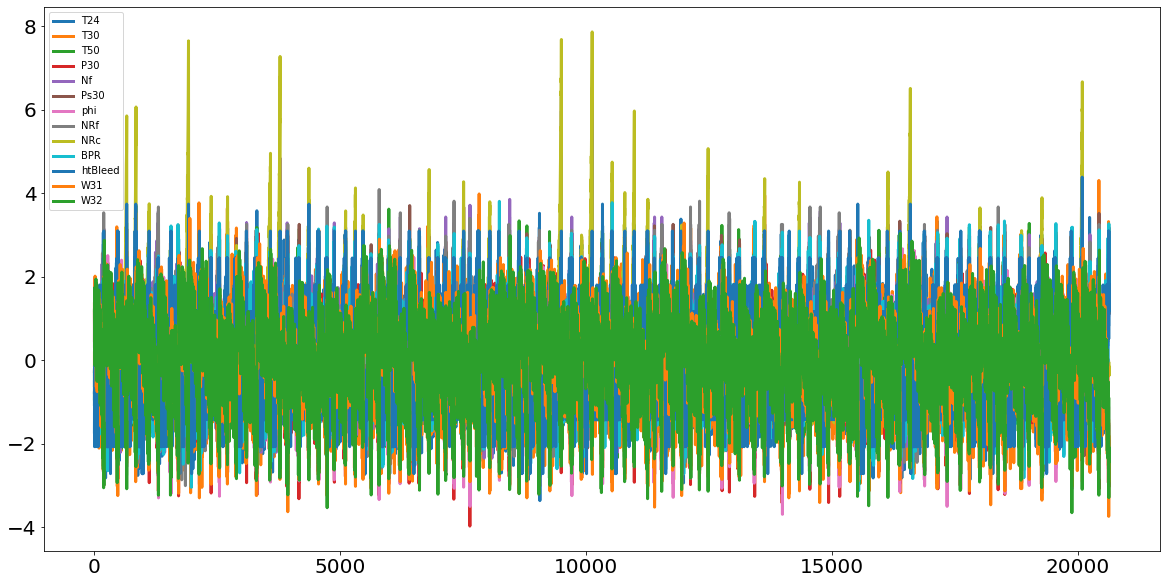

In [47]:
df_feat.plot(figsize=(20,10), linewidth=3, fontsize = 20)